# Recommendation system for Wikipedia articles.

### Necessary imports

In [1]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import requests
from bs4 import BeautifulSoup
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import sys  

sys.path.insert(1, './scrapy/')

from one_page_scrapper import OnePageScrapper

## Crawling and scraping data

Crawling is done with the scrapy library, the script is located in /scrapy/scrap.py. It takes in a list of URLs of wikipedia articles and a number that denotes the desired number of pages to scrap (Approximate, since some sites cannot be scrapped for different reasons). The passed URLs serve as starting points for the scrapping process. For every website, the script loads in the text in the title element, as well as the text inside the content container. The data is then saved in a pandas DataFrame.

## Tokenization, lemmatization and transformation of data

This process takes place inside the scrapping script described above. Once all websites are scrapped, the text from title and content elements are tokenized with the word_tokenize function from nltk.tokenize module. The stopwords are then removed (the list of stopwords comes from nltk.corpus.stopwords). At the end, the remaining tokens are lemmatized using WordNetLemmatizer. Then, two TfidfVectorizer models are trained - one of them is trained on the text that comes from title elements, the second one is trained on the content text. The hyperparameters for those models are as follows:
* Title:
    * Minimum token frequency: 2
    * Considered ngrams: 1, 2
* Content:
    * Minimum token frequency: 15
    * Considered ngrams: 1

The data is then transformed using a corresponding vectorizer and is saved to two .csv files - content_transformed.csv and titles_transformed.csv

### Reading the data into the notebook 
After the process of stemmatization and lemmatization the database was stored as a .csv file which now we will read into this notebook. There are 2 different dataframes, first one contains content of all the scraped websites, the second the titles of the scraped websites.

In [2]:
dfC = pd.read_csv('content_transformed.csv')
dfT = pd.read_csv('titles_transformed.csv')
dfC

,URL,00,000,01,02,03,04,05,06,07,...,younger,youngest,your,youth,youtube,yugoslavia,zealand,zero,zone,zones
0,https://en.wikipedia.org/wiki/Herb,0.0,0.007294,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.014318,0.000000
1,https://en.wikipedia.org/wiki/FSO_Polonez,0.0,0.022615,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000
2,https://en.wikipedia.org/wiki/Minecraft,0.0,0.011572,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.002815,0.0,0.0,0.000000,0.048371,0.0,0.0,0.00000,0.000000,0.000000
3,https://en.wikipedia.org/wiki/Cambodia,0.0,0.026013,0.0,0.0,0.0,0.003091,0.0,0.000000,0.0,...,0.002013,0.0,0.0,0.006628,0.000000,0.0,0.0,0.00000,0.000000,0.000000
4,https://en.wikipedia.org/wiki/Real_Madrid_CF,0.0,0.011587,0.0,0.0,0.0,0.000000,0.0,0.002393,0.0,...,0.000000,0.0,0.0,0.003608,0.000000,0.0,0.0,0.00209,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,https://en.wikipedia.org/wiki/Vegetables,0.0,0.018449,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.008618,0.000000,0.0,0.0,0.00000,0.000000,0.009985
1222,https://en.wikipedia.org/wiki/Mentha,0.0,0.006647,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000
1223,https://en.wikipedia.org/wiki/Garden,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000
1224,https://en.wikipedia.org/wiki/Herb_(disambigua...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000


### Exploring the data in the database.
Some of the plots are interactive - allow to zoom in and out or select specific objects and receive more clearly information.

First we will see the similarity between documents in terms of their contents and titles seperately.

In [3]:
sim_Content = cosine_similarity(dfC.iloc[:, 1:]) #calculate similarity between documents' contents in database 
sim_Titles = cosine_similarity(dfT.iloc[:, 1:]) #calculate similarity between documents' titles in database 

In [ ]:
fig1 = px.imshow(sim_Content,
                x=dfC.index,
                y=dfC.index,
                labels=dict(x='Document', y='Document', color='Similarity'),
                color_continuous_scale='Viridis')
fig1.update_layout(title="Cosine Similarity between Wikipedia Pages' Contents" ,
                  xaxis_title='Document',
                  yaxis_title='Document',
                  width=800,
                  height=600)

fig2 = px.imshow(sim_Titles,
                x=dfT.index,
                y=dfT.index,
                labels=dict(x='Document', y='Document', color='Similarity'),
                color_continuous_scale='Viridis')
fig2.update_layout(title="Cosine Similarity between Wikipedia Pages' Titles" ,
                  xaxis_title='Document',
                  yaxis_title='Document',
                  width=800,
                  height=600)

fig = make_subplots(rows=1, cols=2, subplot_titles=["Similarity of Contents", "Similarity of Titles"])
fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2)
fig.update_layout(width=1200, height=600, showlegend=False)
fig.show()

We can notice that titles by themselves are very rarely informative in terms of similarity between two different documents. Far more information can be derived from the contents of the webpages. The graph clearly presents that data in the database is diverse, but also to some excent is similar. We can notice that even some shapes from the contents similarity can be more or less noticed in the titles similarity (e.g. document around 540 and 550 create a square of similarity on both graphs).

Now let us analyze the most frequently appearing words in the whole dataset.

In [5]:
print("Ten most frequent words in contents of webpages in our dataset:")
print(dfC.iloc[:,1:].sum().nlargest(10))
print("Ten most frequent words in titles of webpages in our dataset:")
print(dfT.iloc[:,1:].sum().nlargest(10))

Ten most frequent words in contents of webpages in our dataset:
the     527.065065
of      243.106714
and     240.754196
in      224.282678
to      160.686326
is      103.208143
as       87.343954
was      78.196213
for      69.553494
with     60.315416
dtype: float64
Ten most frequent words in titles of webpages in our dataset:
of            34.441126
jackson       16.943659
cambodia      16.492053
game          14.273126
derbyshire    13.818806
house         11.866874
in            10.191801
the           10.130416
and            9.917410
minecraft      9.701235
dtype: float64


And finally let us analyze the number of different words in the document of our dataset.

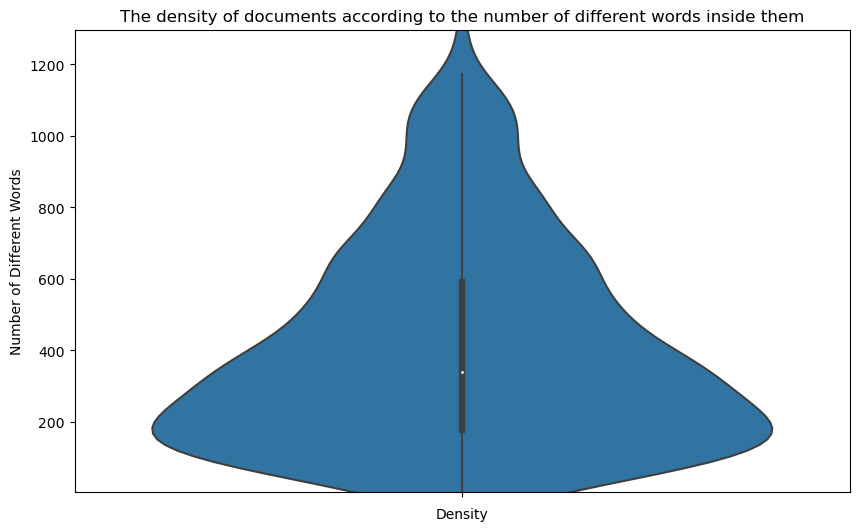

In [6]:
df = dfC.nunique(axis=1)
plt.figure(figsize=(10, 6))
sns.violinplot(y=df)
plt.xlabel('Density')
plt.ylabel('Number of Different Words')
plt.ylim(df.min(), df.max())
plt.title('The density of documents according to the number of different words inside them')
plt.show()

## Similarities

### Example query and number of recommendations input 

In [7]:
query = ["https://en.wikipedia.org/wiki/Poland",
         "https://en.wikipedia.org/wiki/Flag_of_Poland",
         "https://en.wikipedia.org/wiki/Vampire",
         "https://en.wikipedia.org/wiki/Zombie",
         "https://en.wikipedia.org/wiki/Coat_of_arms_of_Poland",]

number_of_recomendations = 10

### Scraping the query websites
Let us scrape these websites and store all the necessary information about the contents and titles.

We are scarping the data using our own class that is imported from the file one_page_scrapper.py

In [8]:
scrapper = OnePageScrapper()
dfQC = pd.DataFrame()
dfQT = pd.DataFrame()
for i in range(len(query)):
    if not len(query) > 0 or not len(query[i]) > 0:
        print("incorrect links provided")
    elif query[i][0:6] == 'https:':
        res = scrapper.scrap_site(query[i]) # Scrape the given website in the query 
    else:
        res = scrapper.scrap_site('https://en.wikipedia.org/wiki/' + query[i]) # Scrape the given website in the query 
    dfQT[f'Q{i}'] = np.append(query[i], res['title']) # divide it into title and content dataframes
    dfQC[f'Q{i}'] = np.append(query[i], res['content'])

dfQC = dfQC.T # Transpose both dataframes
dfQT = dfQT.T
dfQC.columns = dfC.columns # Replace the columns names with the column names from our database
dfQT.columns = dfT.columns

First of all we have decided to perform a KMeans algorithm on the actual query itself, as we have thought of the fact that not all the previously visited webpages by the user may be of any iterest to the user, as perhaps they could have been just a digression or a missclick.

Let us test this theory on the provided example of links.

In [9]:
sim_QC = cosine_similarity(dfQC.iloc[:, 1:], dfQC.iloc[:, 1:])
sim_QT = cosine_similarity(dfQT.iloc[:, 1:], dfQT.iloc[:, 1:])

fig1 = px.imshow(sim_QC,
                x=dfQC.index,
                y=dfQC.index,
                labels=dict(x='Document', y='Document', color='Similarity'),
                color_continuous_scale='Viridis')
fig1.update_layout(title="Cosine Similarity between Wikipedia Pages' Contents",
                  xaxis_title='Document',
                  yaxis_title='Document',
                  width=800,
                  height=600)

fig2 = px.imshow(sim_QT,
                x=dfQT.index,
                y=dfQT.index,
                labels=dict(x='Document', y='Document', color='Similarity'),
                color_continuous_scale='Viridis')
fig2.update_layout(title="Cosine Similarity between Wikipedia Pages' Titles",
                  xaxis_title='Document',
                  yaxis_title='Document',
                  width=800,
                  height=600)

fig = make_subplots(rows=1, cols=2, subplot_titles=["Similarity of Contents of Query", "Similarity of Titles of Query"])
fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2)
fig.update_layout(width=1200, height=600, showlegend=False)
fig.show()

### KMeans
We can clearly see that Q2 and Q3 both have absolutely 0 similarity to other titles, and slightly lower similarity in terms of contents. Thus making it obvious that the user most likely is not interested in given webpages, as the rest of the pages are more correlated to each other and there are more of them in total.

Thus performing the KMeans algorithm (the algorithm will run only if the query has received at least 3 links).

In [10]:
if len(query) > 2:    
    num_clusters = 2
    kmeans = KMeans(n_clusters=num_clusters, n_init='auto')
    kmeans.fit(dfQC.iloc[:, 1:])
    cluster_labels = kmeans.labels_
    category1 = [f'Q{i}' for i in range(len(query)) if cluster_labels[i] == 0]
    category2 = [f'Q{i}' for i in range(len(query)) if cluster_labels[i] == 1]
else:
    category1 = [f'Q{i}' for i in range(len(query))]
    category2 = []

if len(category1) > len(category2):
    dfQTC = dfQT[~dfQT.index.isin(category2)]
    dfQCC = dfQC[~dfQC.index.isin(category2)]
else:
    dfQTC = dfQT[~dfQT.index.isin(category1)]
    dfQCC = dfQC[~dfQC.index.isin(category1)]

dfQCC

,URL,00,000,01,02,03,04,05,06,07,...,younger,youngest,your,youth,youtube,yugoslavia,zealand,zero,zone,zones
Q0,https://en.wikipedia.org/wiki/Poland,0.0,0.01766087475896832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0017689933350259364,0.0,0.0,0.0019411728896623446,0.0,0.0,0.0,0.0,0.0,0.004498280079552472
Q1,https://en.wikipedia.org/wiki/Flag_of_Poland,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q2,https://en.wikipedia.org/wiki/Vampire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.003437724309066045,0.0,0.0,0.0,0.0,0.0,0.0
Q4,https://en.wikipedia.org/wiki/Coat_of_arms_of_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Cosine similarity of contents
Then based on the links left after the KMeans algorithm has chosen the larger group, we calculate the average of cosine similarity of contents between each element in the database and each element of the query. We first consider the contents as they are the most informative. Additionally, we receive only the top results, and based on the number of recommendations cut the whole database to be at most $1.5 * numberOfRecommendationsToBeMade$. For a single element of database D the similarity of its content with the whole query content is given by: $\frac{\sum_{i=1}^{len(query)} cosSim(Q_i, D)} {len(query)} $

In [11]:
result = np.mean(cosine_similarity(dfC.iloc[:, 1:], dfQCC.iloc[:, 1:]), axis = 1)
sorted_indices = np.argsort(result)[::-1]
contents = result[sorted_indices[:round(number_of_recomendations * 1.5)]]
top_n_indexes = sorted_indices[:round(number_of_recomendations * 1.5)]
print(dfC.loc[top_n_indexes]["URL"])

1170          https://en.wikipedia.org/wiki/Poland
1174          https://en.wikipedia.org/wiki/Warsaw
774          https://en.wikipedia.org/wiki/Albania
785           https://en.wikipedia.org/wiki/Jordan
792          https://en.wikipedia.org/wiki/Bolivia
692         https://en.wikipedia.org/wiki/Florence
1163    https://en.wikipedia.org/wiki/Nysa,_Poland
10           https://en.wikipedia.org/wiki/England
955           https://en.wikipedia.org/wiki/Europe
76            https://en.wikipedia.org/wiki/Surrey
1070        https://en.wikipedia.org/wiki/Cherokee
938     https://en.wikipedia.org/wiki/Polish_zloty
1162           https://en.wikipedia.org/wiki/Cairo
582           https://en.wikipedia.org/wiki/Vienna
1134       https://en.wikipedia.org/wiki/Astrology
Name: URL, dtype: object


### Cosine similarity of titles
Above we can see all the database recommended solutions, now to cut it and order it even more we actually will consider the titles similiarity. It might not change anything but it is worth a try as sometimes it can influence the results in a big way. After this operation the database needs to be ordered, as the number of positions is limited to the number of recommendations already.

In [12]:
titles = np.mean(cosine_similarity(dfT.iloc[:, 1:].loc[top_n_indexes], dfQTC.iloc[:, 1:]), axis = 1)
values = titles + contents
urls = dfC.loc[top_n_indexes]["URL"]
recommendations = pd.DataFrame({'URL': urls, 'RecommendationValue': values, 'ContentSimilarity': contents, 'TitleSimilarity': titles})
recommendations = recommendations.sort_values(by='RecommendationValue', ascending=False)
recommendations = recommendations.head(number_of_recomendations)
recommendations

,URL,RecommendationValue,ContentSimilarity,TitleSimilarity
1170,https://en.wikipedia.org/wiki/Poland,1.447672,0.798507,0.649165
1163,"https://en.wikipedia.org/wiki/Nysa,_Poland",1.357296,0.708131,0.649165
1174,https://en.wikipedia.org/wiki/Warsaw,0.755972,0.755972,0.000000
774,https://en.wikipedia.org/wiki/Albania,0.735738,0.735738,0.000000
785,https://en.wikipedia.org/wiki/Jordan,0.717556,0.717556,0.000000
792,https://en.wikipedia.org/wiki/Bolivia,0.715013,0.715013,0.000000
692,https://en.wikipedia.org/wiki/Florence,0.714920,0.714920,0.000000
10,https://en.wikipedia.org/wiki/England,0.707228,0.707228,0.000000
955,https://en.wikipedia.org/wiki/Europe,0.705343,0.705343,0.000000
76,https://en.wikipedia.org/wiki/Surrey,0.703986,0.703986,0.000000


### Ordering based on link number
In addition, we have decided that it would be beneficial for Wikipedia to provide the pages with the biggest number of external links as that would result in the highest possibility of a user continuing to search on their website. Thus once again we visit the very limited number of webpages and count the number of \<a> tags in the html. Thus we order the whole list of recommendations based on the following formula: $\frac{(content\_similarity(D) + title\_similarity(D)) * (1 + normalized(number\_of\_links))} {4}$

In [13]:
def getLinks(url):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            links = soup.find_all('a')
            return len(links)
        else:
            return 0 
    except Exception as e:
        print(f"An error occurred: {e}")
        return 0
    

links = []

for i in recommendations['URL']:
    links += [getLinks(i)]
links = np.array(links)
if len(links) > 0:
        links_norm = (links - links.min()) / (links.max() - links.min())
else:
    links_norm = 0
print(links_norm)

[0.9759482  0.         0.8640148  0.98982424 0.72779833 0.52358927
 0.45212766 0.92044403 1.         0.43432007]


### Final recommendations
Below we order the list of all recommendations based on the final formula. The results may be slightly worse in terms of accuracy, but it ensures that the user will continue to use wikipedia longer, by providing webpages with the highest number of links first. This dataframe perfectly shows how the decision was made, and all step by step calculations are available. 

In [14]:
recommendations['LinksNrNorm'] = links_norm
recommendations['RecommendationValue'] = (recommendations['ContentSimilarity'] + recommendations['TitleSimilarity']) * (1 + recommendations['LinksNrNorm']) / 4
recommendations = recommendations.sort_values(by='RecommendationValue', ascending=False)
recommendations

,URL,RecommendationValue,ContentSimilarity,TitleSimilarity,LinksNrNorm
1170,https://en.wikipedia.org/wiki/Poland,0.715131,0.798507,0.649165,0.975948
774,https://en.wikipedia.org/wiki/Albania,0.365997,0.735738,0.000000,0.989824
955,https://en.wikipedia.org/wiki/Europe,0.352671,0.705343,0.000000,1.000000
1174,https://en.wikipedia.org/wiki/Warsaw,0.352286,0.755972,0.000000,0.864015
10,https://en.wikipedia.org/wiki/England,0.339548,0.707228,0.000000,0.920444
1163,"https://en.wikipedia.org/wiki/Nysa,_Poland",0.339324,0.708131,0.649165,0.000000
785,https://en.wikipedia.org/wiki/Jordan,0.309948,0.717556,0.000000,0.727798
792,https://en.wikipedia.org/wiki/Bolivia,0.272347,0.715013,0.000000,0.523589
692,https://en.wikipedia.org/wiki/Florence,0.259539,0.714920,0.000000,0.452128
76,https://en.wikipedia.org/wiki/Surrey,0.252435,0.703986,0.000000,0.434320


Defining the method for easier use of the whole recommendatiuon system.

In [15]:
def recommend(query, num_of_recomendations):
    scrapper = OnePageScrapper()
    dfQC = pd.DataFrame()
    dfQT = pd.DataFrame()
    for i in range(len(query)):
        if not len(query) > 0 or not len(query[i]) > 0:
            print("incorrect links provided")
            return 0, "error"
        elif query[i][0:6] == 'https:':
            res = scrapper.scrap_site(query[i]) # Scrape the given website in the query 
        else:
            res = scrapper.scrap_site('https://en.wikipedia.org/wiki/' + query[i]) # Scrape the given website in the query 
        dfQT[f'Q{i}'] = np.append(query[i], res['title']) # divide it into title and content dataframes
        dfQC[f'Q{i}'] = np.append(query[i], res['content'])
    dfQC = dfQC.T
    dfQT = dfQT.T
    dfQC.columns = dfC.columns
    dfQT.columns = dfT.columns

    if len(query) > 2:    
        num_clusters = 2
        kmeans = KMeans(n_clusters=num_clusters, n_init='auto')
        kmeans.fit(dfQC.iloc[:, 1:])
        cluster_labels = kmeans.labels_
        category1 = [f'Q{i}' for i in range(len(query)) if cluster_labels[i] == 0]
        category2 = [f'Q{i}' for i in range(len(query)) if cluster_labels[i] == 1]
    else:
        category1 = [f'Q{i}' for i in range(len(query))]
        category2 = []

    if len(category1) > len(category2):
        dfQTC = dfQT[~dfQT.index.isin(category2)]
        dfQCC = dfQC[~dfQC.index.isin(category2)]
        categorised = category1
    else:
        dfQTC = dfQT[~dfQT.index.isin(category1)]
        dfQCC = dfQC[~dfQC.index.isin(category1)]
        categorised = category2

    result = np.mean(cosine_similarity(dfC.iloc[:, 1:], dfQCC.iloc[:, 1:]), axis = 1)
    sorted_indices = np.argsort(result)[::-1]
    contents = result[sorted_indices[:round(num_of_recomendations * 1.5)]]
    top_n_indexes = sorted_indices[:round(num_of_recomendations * 1.5)]

    titles = np.mean(cosine_similarity(dfT.iloc[:, 1:].loc[top_n_indexes], dfQTC.iloc[:, 1:]), axis = 1)
    values = titles + contents
    urls = dfC.loc[top_n_indexes]["URL"]
    recommendations = pd.DataFrame({'URL': urls, 'RecommendationValue': values, 'ContentSimilarity': contents, 'TitleSimilarity': titles})
    recommendations = recommendations.sort_values(by='RecommendationValue', ascending=False)
    recommendations = recommendations.head(num_of_recomendations)
    
    links = []
    for i in recommendations['URL']:
        links += [getLinks(i)]
    links = np.array(links)
    if len(links) > 1:
        links_norm = (links - links.min()) / (links.max() - links.min())
    else:
        links_norm = 1

    recommendations['LinksNrNorm'] = links_norm
    recommendations['RecommendationValue'] = (recommendations['ContentSimilarity'] + recommendations['TitleSimilarity']) * (1 + recommendations['LinksNrNorm']) / 4
    recommendations = recommendations.sort_values(by='RecommendationValue', ascending=False)
    return recommendations, categorised
    

### Testing

Works for queries with single link.

In [16]:
query = ["https://en.wikipedia.org/wiki/Zombie",]

number_of_recomendations = 10

df, based_on = recommend(query, number_of_recomendations)
print(f"The predictions were based on the {np.array([s[1:] for s in based_on])} links")
print(f"The most recommended element is {df['URL'].iloc[0]} calculated with: \ncontent similarity = {df['ContentSimilarity'].iloc[0]}\ntitle similarity = {df['TitleSimilarity'].iloc[0]} \ncontentSim + titleSim = {df['TitleSimilarity'].iloc[0] + df['ContentSimilarity'].iloc[0]} \n1 + normalized number of links = {1 + df['LinksNrNorm'].iloc[0]} \n(titleSim + contentSim) * (1 + norm(nrLinks)) = {(df['TitleSimilarity'].iloc[0] + df['ContentSimilarity'].iloc[0]) * (1 + df['LinksNrNorm'].iloc[0])} \nfinal result = [(titleSim + contentSim) * (1 + norm(nrLinks))] / 4 = {df['RecommendationValue'].iloc[0]}")
df

The predictions were based on the ['0'] links
The most recommended element is https://en.wikipedia.org/wiki/Albania calculated with: 
content similarity = 0.795782076118417
title similarity = 0.0 
contentSim + titleSim = 0.795782076118417 
1 + normalized number of links = 2.0 
(titleSim + contentSim) * (1 + norm(nrLinks)) = 1.591564152236834 
final result = [(titleSim + contentSim) * (1 + norm(nrLinks))] / 4 = 0.3978910380592085


,URL,RecommendationValue,ContentSimilarity,TitleSimilarity,LinksNrNorm
774,https://en.wikipedia.org/wiki/Albania,0.397891,0.795782,0.0,1.000000
10,https://en.wikipedia.org/wiki/England,0.370557,0.772315,0.0,0.919203
1174,https://en.wikipedia.org/wiki/Warsaw,0.356851,0.770117,0.0,0.853488
785,https://en.wikipedia.org/wiki/Jordan,0.334428,0.789277,0.0,0.694856
1162,https://en.wikipedia.org/wiki/Cairo,0.301888,0.769460,0.0,0.569351
792,https://en.wikipedia.org/wiki/Bolivia,0.284051,0.779801,0.0,0.457043
1134,https://en.wikipedia.org/wiki/Astrology,0.275714,0.788542,0.0,0.398600
692,https://en.wikipedia.org/wiki/Florence,0.269031,0.783308,0.0,0.373822
533,https://en.wikipedia.org/wiki/Hell,0.225755,0.785594,0.0,0.149475
814,https://en.wikipedia.org/wiki/Parody,0.194299,0.777195,0.0,0.000000


Also works for queries that are larger.

In [17]:
query = ["https://en.wikipedia.org/wiki/Game",
         "https://en.wikipedia.org/wiki/Steam_(service)",
         "https://en.wikipedia.org/wiki/Epic_Games",
         "https://en.wikipedia.org/wiki/Unreal_Engine",
         "https://en.wikipedia.org/wiki/FromSoftware",
         'https://en.wikipedia.org/wiki/Capcom']

number_of_recomendations = 5

df, based_on = recommend(query, number_of_recomendations)
print(f"The predictions were based on the {np.array([s[1:] for s in based_on])} links")
print(f"The most recommended element is {df['URL'].iloc[0]} calculated with: \ncontent similarity = {df['ContentSimilarity'].iloc[0]}\ntitle similarity = {df['TitleSimilarity'].iloc[0]} \ncontentSim + titleSim = {df['TitleSimilarity'].iloc[0] + df['ContentSimilarity'].iloc[0]} \n1 + normalized number of links = {1 + df['LinksNrNorm'].iloc[0]} \n(titleSim + contentSim) * (1 + norm(nrLinks)) = {(df['TitleSimilarity'].iloc[0] + df['ContentSimilarity'].iloc[0]) * (1 + df['LinksNrNorm'].iloc[0])} \nfinal result = [(titleSim + contentSim) * (1 + norm(nrLinks))] / 4 = {df['RecommendationValue'].iloc[0]}")
df

The predictions were based on the ['0' '1' '4' '5'] links
The most recommended element is https://en.wikipedia.org/wiki/Video_game_development calculated with: 
content similarity = 0.5824594382360946
title similarity = 0.11003551439129027 
contentSim + titleSim = 0.6924949526273848 
1 + normalized number of links = 2.0 
(titleSim + contentSim) * (1 + norm(nrLinks)) = 1.3849899052547696 
final result = [(titleSim + contentSim) * (1 + norm(nrLinks))] / 4 = 0.3462474763136924


,URL,RecommendationValue,ContentSimilarity,TitleSimilarity,LinksNrNorm
833,https://en.wikipedia.org/wiki/Video_game_devel...,0.346247,0.582459,0.110036,1.000000
509,https://en.wikipedia.org/wiki/Mass_Effect,0.279858,0.578458,0.000000,0.935204
512,https://en.wikipedia.org/wiki/Video_game_modding,0.260970,0.609028,0.136886,0.399466
992,https://en.wikipedia.org/wiki/Box_art,0.183093,0.588701,0.136886,0.009352
207,https://en.wikipedia.org/wiki/Zachtronics,0.150186,0.600744,0.000000,0.000000


Prints messages if an error was occured in the query name.

In [18]:
query = [""]

number_of_recomendations = 1

df, based_on = recommend(query, number_of_recomendations)
print(f"The predictions were based on the {np.array([s[1:] for s in based_on])} links")
df

incorrect links provided
The predictions were based on the ['' '' '' '' ''] links


0

## Creators
* Kajetan Sulwiński (ekohachi22)
* Mikołaj Marmurowicz (Mickeyo0o)